# **PEMBAGIAN DATASET**

In [1]:
import os
import random
import shutil

# Path folder utama yang akan diproses (ganti sesuai dengan path di Kaggle)
data_path = '/kaggle/input/images2'  # Path ke folder input di Kaggle
output_path = '/kaggle/working'  # Folder output untuk menyimpan hasil

subfolders = ['melanoma', 'basal cell carcinoma', 'melanocytic nevi', 'benign keratosis']

# Persentase pembagian data
train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1

# Path folder tujuan untuk train, val, dan test
train_folder = os.path.join(output_path, 'train')
val_folder = os.path.join(output_path, 'val')
test_folder = os.path.join(output_path, 'test')

# Membuat folder tujuan jika belum ada
for folder in [train_folder, val_folder, test_folder]:
    os.makedirs(folder, exist_ok=True)

# Mendefinisikan ekstensi file gambar yang diterima
image_extensions = ['.jpg', '.jpeg']  # Tambahkan ekstensi lain jika perlu

for subfolder in subfolders:
    # Path folder subfolder (kelas) di folder utama
    subfolder_path = os.path.join(data_path, subfolder)

    # Membuat sub-folder kelas di dalam train, val, dan test
    os.makedirs(os.path.join(train_folder, subfolder), exist_ok=True)
    os.makedirs(os.path.join(val_folder, subfolder), exist_ok=True)
    os.makedirs(os.path.join(test_folder, subfolder), exist_ok=True)

    # Mendapatkan daftar semua gambar di folder kelas
    imgs_list = [filename for filename in os.listdir(subfolder_path)
                 if os.path.splitext(filename)[-1].lower() in image_extensions]

    # Mengacak daftar gambar dengan seed agar konsisten
    random.seed(42)
    random.shuffle(imgs_list)

    # Menentukan jumlah gambar untuk train, val, dan test
    train_size = int(len(imgs_list) * train_ratio)
    val_size = int(len(imgs_list) * val_ratio)
    test_size = len(imgs_list) - train_size - val_size  # Menghitung test_size dengan sisa

    # Menyalin gambar ke folder tujuan
    for i, img_name in enumerate(imgs_list):
        src_path = os.path.join(subfolder_path, img_name)

        if i < train_size:
            dest_folder = os.path.join(train_folder, subfolder)
        elif i < train_size + val_size:
            dest_folder = os.path.join(val_folder, subfolder)
        else:
            dest_folder = os.path.join(test_folder, subfolder)

        shutil.copy(src_path, os.path.join(dest_folder, img_name))

print("Pembagian dataset selesai!")


Pembagian dataset selesai!


In [2]:
import os
# Tentukan path ke folder dataset
base_dir = ('/kaggle/working')
print("Contents of base directory:")
print(os.listdir(base_dir))

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/val'))

Contents of base directory:
['test', 'train', 'val', '.virtual_documents']
Contents of base directory:
['test', 'train', 'val', '.virtual_documents']

Contents of train directory:
['melanocytic nevi', 'benign keratosis', 'melanoma', 'basal cell carcinoma']

Contents of validation directory:
['melanocytic nevi', 'benign keratosis', 'melanoma', 'basal cell carcinoma']


In [3]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Directory with training melanoma/bcc/scc pictures
train_melanoma_dir = os.path.join(train_dir, 'melanoma')
train_bcc_dir = os.path.join(train_dir, 'basal cell carcinoma')
train_nv_dir = os.path.join(train_dir, 'melanocytic nevi')
train_bk_dir = os.path.join(train_dir, 'benign keratosis')

# Directory with validation melanoma/bcc/scc pictures
validation_melanoma_dir = os.path.join(validation_dir, 'melanoma')
validation_bcc_dir = os.path.join(validation_dir, 'basal cell carcinoma')
validation_nv_dir = os.path.join(validation_dir, 'melanocytic nevi')
validation_bk_dir = os.path.join(validation_dir, 'benign keratosis')

# Directory with test melanoma/bcc/scc pictures

test_melanoma_dir = os.path.join(test_dir, 'melanoma')
test_bcc_dir = os.path.join(test_dir, 'basal cell carcinoma')
test_nv_dir = os.path.join(test_dir, 'melanocytic nevi')
test_bk_dir = os.path.join(test_dir, 'benign keratosis')


In [4]:
print('total training melanoma images :', len(os.listdir(      train_melanoma_dir ) ))
print('total training basal cell carcinoma images :', len(os.listdir(      train_bcc_dir ) ))
print('total training melanocytic nevi images :', len(os.listdir(      train_nv_dir ) ))
print('total training benign keratosis images :', len(os.listdir(      train_bk_dir ) ))

print('total validation melanoma images :', len(os.listdir( validation_melanoma_dir ) ))
print('total validation basal cell carcinoma images :', len(os.listdir( validation_bcc_dir ) ))
print('total validation melanocytic nevi images :', len(os.listdir( validation_nv_dir)))
print('total validation benign keratosis images :', len(os.listdir( validation_bk_dir)))

print('total test melanoma images :', len(os.listdir( test_melanoma_dir ) ))
print('total test basal cell carcinoma images :', len(os.listdir( test_bcc_dir ) ))
print('total test melanocytic nevi images :', len(os.listdir( test_nv_dir)))
print('total test benign keratosis images :', len(os.listdir( test_bk_dir)))

total training melanoma images : 3165
total training basal cell carcinoma images : 2326
total training melanocytic nevi images : 9012
total training benign keratosis images : 1836
total validation melanoma images : 452
total validation basal cell carcinoma images : 332
total validation melanocytic nevi images : 1287
total validation benign keratosis images : 262
total test melanoma images : 905
total test basal cell carcinoma images : 665
total test melanocytic nevi images : 2576
total test benign keratosis images : 526


In [5]:
# Menghitung total gambar untuk setiap bagian dataset
total_train_images = (len(os.listdir(train_melanoma_dir)) +
                      len(os.listdir(train_bcc_dir)) +
                      len(os.listdir(train_nv_dir)) +
                      len(os.listdir(train_bk_dir))) 
                     
total_validation_images = (len(os.listdir(validation_melanoma_dir)) +
                           len(os.listdir(validation_bcc_dir)) +
                           len(os.listdir(validation_nv_dir)) +
                           len(os.listdir(validation_bk_dir))) 
                     
total_test_images = (len(os.listdir(test_melanoma_dir)) +
                     len(os.listdir(test_bcc_dir)) +
                     len(os.listdir(test_nv_dir)) +
                     len(os.listdir(test_bk_dir))) 
                     
# Menghitung total gambar keseluruhan
total_images = total_train_images + total_validation_images + total_test_images

# Menampilkan hasil
print('Total training images:', total_train_images)
print('Total validation images:', total_validation_images)
print('Total test images:', total_test_images)
print('Total images overall:', total_images)


Total training images: 16339
Total validation images: 2333
Total test images: 4672
Total images overall: 23344


# **AUGMENTASI DATA**

In [6]:
import os
import cv2
import random
import numpy as np

def rotate_image(image_dir, angle, output_dir, max_augmented, seed=None):
    """
    Rotasi gambar secara acak dalam direktori dengan batasan jumlah gambar.
    Simpan hanya gambar hasil rotasi dalam satu direktori.
    
    Args:
    - image_dir (str): Direktori berisi gambar input.
    - angle (float): Sudut rotasi.
    - output_dir (str): Direktori output untuk menyimpan gambar hasil rotasi.
    - max_augmented (int): Batas maksimal jumlah gambar yang akan diaugmentasi.
    - seed (int, optional): Seed untuk randomisasi agar hasil konsisten.
    
    Returns:
    - None
    """
    # Set random seed untuk memastikan hasil acak yang konsisten jika diperlukan
    if seed is not None:
        random.seed(seed)

    # Membuat direktori output jika belum ada, agar gambar yang dihasilkan dapat disimpan
    os.makedirs(output_dir, exist_ok=True)

    # Dapatkan semua file gambar dalam direktori yang memiliki ekstensi .png, .jpg, atau .jpeg
    all_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Pilih gambar secara acak, dengan jumlah maksimum gambar sesuai max_augmented
    selected_files = random.sample(all_files, min(len(all_files), max_augmented))

    # Iterasi melalui semua gambar yang terpilih untuk augmentasi
    for file_name in selected_files:  # Hanya iterasi pada gambar yang dipilih untuk augmentasi
        file_path = os.path.join(image_dir, file_name)
        
        # Membaca gambar dari path yang diberikan
        img = cv2.imread(file_path)
        
        if img is not None:
            # Dapatkan dimensi gambar (tinggi dan lebar)
            rows, cols = img.shape[:2]

            # Buat matriks transformasi untuk rotasi berdasarkan sudut yang diberikan
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)

            # Terapkan rotasi pada gambar menggunakan matriks rotasi yang telah dibuat
            rotated_image = cv2.warpAffine(img, M, (cols, rows))

            # Buat nama file baru untuk gambar hasil rotasi, tambahkan suffix "_rotated_{angle}"
            base_name, ext = os.path.splitext(file_name)
            rotated_file_name = f"{base_name}_rotated_{angle}{ext}"
            rotated_path = os.path.join(output_dir, rotated_file_name)

            # Simpan gambar hasil rotasi ke direktori output
            cv2.imwrite(rotated_path, rotated_image)

    # Menampilkan jumlah gambar yang telah diaugmentasi
    print(f"Total gambar yang diaugmentasi: {len(selected_files)}")

In [7]:
import os
import cv2
import random
import numpy as np

def flip_horizontal_image(image_dir, output_dir, max_augmented, seed=None):
    """
    Fungsi untuk melakukan augmentasi gambar dengan cara membalik gambar secara horizontal
    dan menyimpannya ke dalam direktori output.
    
    Args:
    - image_dir (str): Direktori berisi gambar input yang akan di-flip.
    - output_dir (str): Direktori output untuk menyimpan gambar hasil flip.
    - max_augmented (int): Batas maksimal jumlah gambar yang akan diaugmentasi.
    - seed (int, optional): Seed untuk randomisasi agar hasil augmentasi konsisten.
    
    Returns:
    - None
    """
    # Set random seed jika diberikan (agar hasil randomisasi konsisten)
    if seed is not None:
        random.seed(seed)

    # Membuat direktori output jika belum ada
    os.makedirs(output_dir, exist_ok=True)

    # Mengambil semua nama file gambar dalam direktori
    all_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Pilih gambar secara acak untuk augmentasi, berdasarkan batas maksimal (max_augmented)
    selected_files = random.sample(all_files, min(len(all_files), max_augmented))

    # Iterasi melalui semua file gambar yang dipilih untuk di-flip
    for file_name in selected_files:
        file_path = os.path.join(image_dir, file_name)
        
        # Membaca gambar menggunakan OpenCV
        img = cv2.imread(file_path)
        
        if img is not None:
            # Melakukan flipping horizontal pada gambar (membalik gambar secara horizontal)
            flipped_horizontal = cv2.flip(img, 1)  # 1 berarti flip horizontal

            # Membuat nama file baru untuk gambar yang telah di-flip
            base_name, ext = os.path.splitext(file_name)
            flipped_file_name = f"{base_name}_flipped_horizontal{ext}"
            flipped_path = os.path.join(output_dir, flipped_file_name)

            # Menyimpan gambar yang sudah di-flip ke direktori output
            cv2.imwrite(flipped_path, flipped_horizontal)

    # Mencetak jumlah gambar yang berhasil diaugmentasi
    print(f"Total gambar yang diaugmentasi: {len(selected_files)}")

In [8]:
import os
import cv2
import random
import numpy as np

def flip_vertical_image(image_dir, output_dir, max_augmented, seed=None):
    """
    Flip gambar secara vertikal dalam direktori dengan batasan jumlah gambar.
    Simpan hanya gambar hasil flip dalam satu direktori.
    
    Args:
    - image_dir (str): Direktori berisi gambar input.
    - output_dir (str): Direktori output untuk menyimpan gambar hasil flip.
    - max_augmented (int): Batas maksimal jumlah gambar yang akan diaugmentasi.
    - seed (int, optional): Seed untuk randomisasi agar hasil konsisten.
    
    Returns:
    - None
    """
    # Set random seed
    if seed is not None:
        random.seed(seed)

    # Buat direktori output jika belum ada
    os.makedirs(output_dir, exist_ok=True)

    # Dapatkan semua file gambar dalam direktori
    all_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Pilih gambar secara acak untuk augmentasi
    selected_files = random.sample(all_files, min(len(all_files), max_augmented))

    # Iterasi melalui semua file yang dipilih untuk augmentasi
    for file_name in selected_files:
        file_path = os.path.join(image_dir, file_name)
        
        # Baca gambar
        img = cv2.imread(file_path)
        
        if img is not None:
            # Flipping vertikal
            flipped_vertical = cv2.flip(img, 0)  # 0 untuk vertikal

            # Buat nama file baru untuk gambar hasil flip vertikal
            base_name, ext = os.path.splitext(file_name)
            flipped_file_name = f"{base_name}_flipped_vertical{ext}"
            flipped_path = os.path.join(output_dir, flipped_file_name)

            # Simpan gambar hasil flip ke direktori output
            cv2.imwrite(flipped_path, flipped_vertical)

    print(f"Total gambar yang diaugmentasi: {len(selected_files)}")


In [9]:
import os
import cv2
import random
import numpy as np

def zoom_image(image_dir, output_dir, max_augmented, zoom_factor=0.15, seed=None):
    """
    Lakukan zoom pada gambar dalam direktori dengan batasan jumlah gambar.
    Simpan hanya gambar hasil zoom dalam satu direktori.
    
    Args:
    - image_dir (str): Direktori berisi gambar input.
    - output_dir (str): Direktori output untuk menyimpan gambar hasil zoom.
    - max_augmented (int): Batas maksimal jumlah gambar yang akan diaugmentasi.
    - zoom_factor (float): Faktor perbesaran (default: 0.15).
    - seed (int, optional): Seed untuk randomisasi agar hasil konsisten.
    
    Returns:
    - None
    """
    # Set random seed
    if seed is not None:
        random.seed(seed)

    # Buat direktori output jika belum ada
    os.makedirs(output_dir, exist_ok=True)

    # Dapatkan semua file gambar dalam direktori
    all_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Pilih gambar secara acak untuk augmentasi
    selected_files = random.sample(all_files, min(len(all_files), max_augmented))

    # Iterasi melalui semua file yang dipilih untuk augmentasi
    for file_name in selected_files:
        file_path = os.path.join(image_dir, file_name)
        
        # Baca gambar
        img = cv2.imread(file_path)
        
        if img is not None:
            # Mendapatkan dimensi gambar
            h, w = img.shape[:2]
            
            # Menghitung matrix zoom
            zoom_matrix = cv2.getRotationMatrix2D((w // 2, h // 2), 0, 1 + zoom_factor)
            
            # Lakukan zoom dengan menggunakan affine transform
            zoomed_image = cv2.warpAffine(img, zoom_matrix, (w, h))
            
            # Buat nama file baru untuk gambar hasil zoom
            base_name, ext = os.path.splitext(file_name)
            zoomed_file_name = f"{base_name}_zoomed{ext}"
            zoomed_path = os.path.join(output_dir, zoomed_file_name)

            # Simpan gambar hasil zoom ke direktori output
            cv2.imwrite(zoomed_path, zoomed_image)

    print(f"Total gambar yang diaugmentasi: {len(selected_files)}")

# Contoh penggunaan
# zoom_image('path/to/input/images', 'path/to/output/images', max_augmented=10, zoom_factor=0.15, seed=42)


In [10]:
import os
import cv2
import random
import numpy as np

def adjust_brightness_contrast(image_dir, output_dir, max_augmented, alpha=1.1, beta=5, seed=None):
    """
    Sesuaikan kecerahan dan kontras gambar dalam direktori dengan batasan jumlah gambar.
    Simpan hanya gambar hasil penyesuaian dalam satu direktori.
    
    Args:
    - image_dir (str): Direktori berisi gambar input.
    - output_dir (str): Direktori output untuk menyimpan gambar hasil penyesuaian.
    - max_augmented (int): Batas maksimal jumlah gambar yang akan diaugmentasi.
    - alpha (float): Faktor kontras (default: 1.1).
    - beta (int): Faktor kecerahan (default: 15).
    - seed (int, optional): Seed untuk randomisasi agar hasil konsisten.
    
    Returns:
    - None
    """
    # Set random seed
    if seed is not None:
        random.seed(seed)

    # Buat direktori output jika belum ada
    os.makedirs(output_dir, exist_ok=True)

    # Dapatkan semua file gambar dalam direktori
    all_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Pilih gambar secara acak untuk augmentasi
    selected_files = random.sample(all_files, min(len(all_files), max_augmented))

    # Iterasi melalui semua file yang dipilih untuk augmentasi
    for file_name in selected_files:
        file_path = os.path.join(image_dir, file_name)
        
        # Baca gambar
        img = cv2.imread(file_path)
        
        if img is not None:
            # Sesuaikan kontras dan kecerahan
            adjusted_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
            
            # Buat nama file baru untuk gambar hasil penyesuaian
            base_name, ext = os.path.splitext(file_name)
            adjusted_file_name = f"{base_name}_adjusted{ext}"
            adjusted_path = os.path.join(output_dir, adjusted_file_name)

            # Simpan gambar hasil penyesuaian ke direktori output
            cv2.imwrite(adjusted_path, adjusted_image)

    print(f"Total gambar yang diaugmentasi: {len(selected_files)}")

# Contoh penggunaan
# adjust_brightness_contrast('path/to/input/images', 'path/to/output/images', max_augmented=10, alpha=1.1, beta=15, seed=42)


In [11]:
import os
import cv2
import random
import numpy as np

def shift_image(image_dir, output_dir, max_augmented, height_shift_range=0.2, width_shift_range=0.2, seed=None):
    """
    Geser gambar secara vertikal dan horizontal dalam direktori dengan batasan jumlah gambar.
    Simpan hanya gambar hasil shifting dalam satu direktori.
    
    Args:
    - image_dir (str): Direktori berisi gambar input.
    - output_dir (str): Direktori output untuk menyimpan gambar hasil shifting.
    - max_augmented (int): Batas maksimal jumlah gambar yang akan diaugmentasi.
    - height_shift_range (float): Jangkauan pergeseran vertikal (default: 0.2).
    - width_shift_range (float): Jangkauan pergeseran horizontal (default: 0.2).
    - seed (int, optional): Seed untuk randomisasi agar hasil konsisten.
    
    Returns:
    - None
    """
    # Set random seed
    if seed is not None:
        random.seed(seed)

    # Buat direktori output jika belum ada
    os.makedirs(output_dir, exist_ok=True)

    # Dapatkan semua file gambar dalam direktori
    all_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Pilih gambar secara acak untuk augmentasi
    selected_files = random.sample(all_files, min(len(all_files), max_augmented))

    # Iterasi melalui semua file yang dipilih untuk augmentasi
    for file_name in selected_files:
        file_path = os.path.join(image_dir, file_name)
        
        # Baca gambar
        img = cv2.imread(file_path)
        
        if img is not None:
            # Tentukan dimensi gambar
            height, width = img.shape[:2]

            # Tentukan pergeseran vertikal dan horizontal secara acak berdasarkan rentang
            height_shift = random.uniform(-height_shift_range, height_shift_range) * height
            width_shift = random.uniform(-width_shift_range, width_shift_range) * width

            # Matriks transformasi affine untuk pergeseran
            M = np.float32([[1, 0, width_shift], [0, 1, height_shift]])

            # Terapkan pergeseran pada gambar
            shifted_image = cv2.warpAffine(img, M, (width, height))

            # Buat nama file baru untuk gambar hasil shifting
            base_name, ext = os.path.splitext(file_name)
            shifted_file_name = f"{base_name}_shifted{ext}"
            shifted_path = os.path.join(output_dir, shifted_file_name)

            # Simpan gambar hasil shifting ke direktori output
            cv2.imwrite(shifted_path, shifted_image)

    print(f"Total gambar yang diaugmentasi: {len(selected_files)}")

# Contoh penggunaan
# shift_image('path/to/input/images', 'path/to/output/images', max_augmented=10, height_shift_range=0.2, width_shift_range=0.2, seed=42)


In [12]:
import os
import cv2
import random
import numpy as np

def shearing_image(image_dir, output_dir, max_augmented, shear_factor=0.15, seed=None):
    """
    Terapkan efek shearing pada gambar dalam direktori dengan batasan jumlah gambar.
    Simpan hanya gambar hasil shearing dalam satu direktori.
    
    Args:
    - image_dir (str): Direktori berisi gambar input.
    - output_dir (str): Direktori output untuk menyimpan gambar hasil shearing.
    - max_augmented (int): Batas maksimal jumlah gambar yang akan diaugmentasi.
    - shear_factor (float): Faktor shearing (default: 0.15).
    - seed (int, optional): Seed untuk randomisasi agar hasil konsisten.
    
    Returns:
    - None
    """
    # Set random seed
    if seed is not None:
        random.seed(seed)

    # Buat direktori output jika belum ada
    os.makedirs(output_dir, exist_ok=True)

    # Dapatkan semua file gambar dalam direktori
    all_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Pilih gambar secara acak untuk augmentasi
    selected_files = random.sample(all_files, min(len(all_files), max_augmented))

    # Iterasi melalui semua file yang dipilih untuk augmentasi
    for file_name in selected_files:
        file_path = os.path.join(image_dir, file_name)
        
        # Baca gambar
        img = cv2.imread(file_path)
        
        if img is not None:
            # Tentukan dimensi gambar
            height, width = img.shape[:2]

            # Matriks transformasi untuk shearing
            # Shearing pada sumbu x (horizontal)
            shear_matrix_x = np.float32([[1, shear_factor, 0], [0, 1, 0]])

            # Shearing pada sumbu y (vertikal)
            shear_matrix_y = np.float32([[1, 0, 0], [shear_factor, 1, 0]])

            # Terapkan shearing horizontal dan vertikal
            sheared_image_x = cv2.warpAffine(img, shear_matrix_x, (width, height))
            sheared_image_xy = cv2.warpAffine(sheared_image_x, shear_matrix_y, (width, height))

            # Buat nama file baru untuk gambar hasil shearing
            base_name, ext = os.path.splitext(file_name)
            sheared_file_name = f"{base_name}_sheared{ext}"
            sheared_path = os.path.join(output_dir, sheared_file_name)

            # Simpan gambar hasil shearing ke direktori output
            cv2.imwrite(sheared_path, sheared_image_xy)

    print(f"Total gambar yang diaugmentasi: {len(selected_files)}")

# Contoh penggunaan
# shearing_image('path/to/input/images', 'path/to/output/images', max_augmented=10, shear_factor=0.15, seed=42)


# **MELANOMA**

In [13]:
# Contoh penggunaan
train_melanoma_dir = '/kaggle/working/train/melanoma'  # Direktori input
output_dir = '/kaggle/working/augmentasi_melanoma'                # Direktori output
angle = 90  # Sudut rotasi
max_augmented = 1500  # Batas maksimal jumlah augmentasi
seed = 1  # Seed untuk randomisasi

rotate_image(train_melanoma_dir, angle, output_dir, max_augmented, seed)
print(f"Gambar asli dan hasil augmentasi disimpan di {output_dir}.")

Total gambar yang diaugmentasi: 1500
Gambar asli dan hasil augmentasi disimpan di /kaggle/working/augmentasi_melanoma.


In [14]:
# Contoh penggunaan
train_melanoma_dir = '/kaggle/working/train/melanoma'  # Direktori input
output_dir = '/kaggle/working/augmentasi_melanoma'                # Direktori output
angle = 180  # Sudut rotasi
max_augmented = 1500  # Batas maksimal jumlah augmentasi
seed = 2  # Seed untuk randomisasi

rotate_image(train_melanoma_dir, angle, output_dir, max_augmented, seed)
print(f"Gambar asli dan hasil augmentasi disimpan di {output_dir}.")

Total gambar yang diaugmentasi: 1500
Gambar asli dan hasil augmentasi disimpan di /kaggle/working/augmentasi_melanoma.


In [15]:
# Contoh penggunaan
train_melanoma_dir = '/kaggle/working/train/melanoma'  # Direktori input
output_dir = '/kaggle/working/augmentasi_melanoma'                # Direktori output
angle = 270  # Sudut rotasi
max_augmented = 1500  # Batas maksimal jumlah augmentasi
seed = 3  # Seed untuk randomisasi

rotate_image(train_melanoma_dir, angle, output_dir, max_augmented, seed)
print(f"Gambar asli dan hasil augmentasi disimpan di {output_dir}.")

Total gambar yang diaugmentasi: 1500
Gambar asli dan hasil augmentasi disimpan di /kaggle/working/augmentasi_melanoma.


In [16]:
# Contoh penggunaan
train_melanoma_dir = '/kaggle/working/train/melanoma'  # Direktori input
output_dir = '/kaggle/working/augmentasi_melanoma'                # Direktori output
max_augmented = 1347  # Batas maksimal jumlah augmentasi
seed = 4  # Seed untuk randomisasi

flip_horizontal_image(train_melanoma_dir, output_dir, max_augmented, seed)
print(f"Gambar asli dan hasil augmentasi disimpan di {output_dir}.")


Total gambar yang diaugmentasi: 1347
Gambar asli dan hasil augmentasi disimpan di /kaggle/working/augmentasi_melanoma.


# **BASAL CELL CARCINOMA**

In [17]:
# Contoh penggunaan
train_bcc_dir = '/kaggle/working/train/basal cell carcinoma'  # Direktori input
output_dir = '/kaggle/working/augmentasi_bcc'                # Direktori output
angle = 90  # Sudut rotasi
max_augmented = 2326  # Batas maksimal jumlah augmentasi
seed = 1  # Seed untuk randomisasi

rotate_image(train_bcc_dir, angle, output_dir, max_augmented, seed)
print(f"Gambar asli dan hasil augmentasi disimpan di {output_dir}.")

Total gambar yang diaugmentasi: 2326
Gambar asli dan hasil augmentasi disimpan di /kaggle/working/augmentasi_bcc.


In [18]:
# Contoh penggunaan
train_bcc_dir = '/kaggle/working/train/basal cell carcinoma'  # Direktori input
output_dir = '/kaggle/working/augmentasi_bcc'                # Direktori output
angle = 180  # Sudut rotasi
max_augmented = 2326  # Batas maksimal jumlah augmentasi
seed = 2  # Seed untuk randomisasi

rotate_image(train_bcc_dir, angle, output_dir, max_augmented, seed)
print(f"Gambar asli dan hasil augmentasi disimpan di {output_dir}.")

Total gambar yang diaugmentasi: 2326
Gambar asli dan hasil augmentasi disimpan di /kaggle/working/augmentasi_bcc.


In [19]:
# Contoh penggunaan
train_bcc_dir = '/kaggle/working/train/basal cell carcinoma'  # Direktori input
output_dir = '/kaggle/working/augmentasi_bcc'                # Direktori output
angle = 270  # Sudut rotasi
max_augmented = 2034  # Batas maksimal jumlah augmentasi
seed = 3  # Seed untuk randomisasi

rotate_image(train_bcc_dir, angle, output_dir, max_augmented, seed)
print(f"Gambar asli dan hasil augmentasi disimpan di {output_dir}.")

Total gambar yang diaugmentasi: 2034
Gambar asli dan hasil augmentasi disimpan di /kaggle/working/augmentasi_bcc.


In [20]:
import os

# Path direktori output
output_dir = '/kaggle/working/augmentasi_bcc'

# Hitung jumlah file gambar dalam direktori output
all_files = [f for f in os.listdir(output_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Cetak jumlah file
print(f"Jumlah gambar di direktori '{output_dir}': {len(all_files)}")


Jumlah gambar di direktori '/kaggle/working/augmentasi_bcc': 6686


# **BENIGN KERATOSIS**

In [21]:
# Contoh penggunaan
train_bk_dir = '/kaggle/working/train/benign keratosis'  # Direktori input
output_dir = '/kaggle/working/augmentasi_bk'                # Direktori output
angle = 90  # Sudut rotasi
max_augmented = 1836 # Batas maksimal jumlah augmentasi
seed = 1  # Seed untuk randomisasi

rotate_image(train_bk_dir, angle, output_dir, max_augmented, seed)
print(f"Gambar asli dan hasil augmentasi disimpan di {output_dir}.")


Total gambar yang diaugmentasi: 1836
Gambar asli dan hasil augmentasi disimpan di /kaggle/working/augmentasi_bk.


In [22]:
# Contoh penggunaan
train_bk_dir = '/kaggle/working/train/benign keratosis'  # Direktori input
output_dir = '/kaggle/working/augmentasi_bk'                # Direktori output
angle = 180  # Sudut rotasi
max_augmented = 1836 # Batas maksimal jumlah augmentasi
seed = 2  # Seed untuk randomisasi

rotate_image(train_bk_dir, angle, output_dir, max_augmented, seed)
print(f"Gambar asli dan hasil augmentasi disimpan di {output_dir}.")


Total gambar yang diaugmentasi: 1836
Gambar asli dan hasil augmentasi disimpan di /kaggle/working/augmentasi_bk.


In [23]:
# Contoh penggunaan
train_bk_dir = '/kaggle/working/train/benign keratosis'  # Direktori input
output_dir = '/kaggle/working/augmentasi_bk'                # Direktori output
angle = 270  # Sudut rotasi
max_augmented = 1836 # Batas maksimal jumlah augmentasi
seed = 3  # Seed untuk randomisasi

rotate_image(train_bk_dir, angle, output_dir, max_augmented, seed)
print(f"Gambar asli dan hasil augmentasi disimpan di {output_dir}.")

Total gambar yang diaugmentasi: 1836
Gambar asli dan hasil augmentasi disimpan di /kaggle/working/augmentasi_bk.


In [24]:
# Contoh penggunaan
train_bk_dir = '/kaggle/working/train/benign keratosis'  # Direktori input
output_dir = '/kaggle/working/augmentasi_bk'                # Direktori output
max_augmented = 1668  # Batas maksimal jumlah augmentasi
seed = 4  # Seed untuk randomisasi

flip_horizontal_image(train_bk_dir, output_dir, max_augmented, seed)
print(f"Gambar asli dan hasil augmentasi disimpan di {output_dir}.")


Total gambar yang diaugmentasi: 1668
Gambar asli dan hasil augmentasi disimpan di /kaggle/working/augmentasi_bk.


In [25]:
import os

# Path direktori output
output_dir = '/kaggle/working/augmentasi_bk'

# Hitung jumlah file gambar dalam direktori output
all_files = [f for f in os.listdir(output_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Cetak jumlah file
print(f"Jumlah gambar di direktori '{output_dir}': {len(all_files)}")


Jumlah gambar di direktori '/kaggle/working/augmentasi_bk': 7176


# **MERGE DATA**

In [26]:
import os
import shutil

def copy_augmentations_to_train(augment_dir, train_dir, class_name):
    """
    Salin gambar augmentasi ke direktori train berdasarkan kelas.
    
    Args:
    - augment_dir (str): Direktori berisi gambar augmentasi.
    - train_dir (str): Direktori utama train yang memiliki sub-direktori kelas.
    - class_name (str): Nama kelas untuk menentukan sub-direktori tujuan.
    
    Returns:
    - None
    """
    # Path sub-direktori kelas di dalam train
    class_train_dir = os.path.join(train_dir, class_name)

    # Pastikan sub-direktori kelas ada
    os.makedirs(class_train_dir, exist_ok=True)

    # Iterasi melalui gambar augmentasi
    augmented_files = [f for f in os.listdir(augment_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    for file_name in augmented_files:
        src_path = os.path.join(augment_dir, file_name)
        dst_path = os.path.join(class_train_dir, file_name)

        # Jika ada konflik nama file, tambahkan prefix/suffix
        if os.path.exists(dst_path):
            base_name, ext = os.path.splitext(file_name)
            file_name = f"{base_name}_augmented{ext}"
            dst_path = os.path.join(class_train_dir, file_name)

        shutil.copy(src_path, dst_path)

    print(f"Gambar augmentasi dari {augment_dir} telah disalin ke {class_train_dir}.")

def delete_folder(folder_path):
    """
    Hapus folder beserta semua isinya.
    
    Args:
    - folder_path (str): Path folder yang akan dihapus.
    
    Returns:
    - None
    """
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"Folder {folder_path} berhasil dihapus.")
    else:
        print(f"Folder {folder_path} tidak ditemukan.")

# Contoh penggunaan
train_dir = '/kaggle/working/train'

# Direktori augmentasi per kelas
augmentasi_dirs = {
    'melanoma': '/kaggle/working/augmentasi_melanoma',
    'basal cell carcinoma': '/kaggle/working/augmentasi_bcc',
    'benign keratosis': '/kaggle/working/augmentasi_bk',
    }

# Salin dan hapus folder augmentasi
for class_name, augment_dir in augmentasi_dirs.items():
    copy_augmentations_to_train(augment_dir, train_dir, class_name)
    delete_folder(augment_dir)


Gambar augmentasi dari /kaggle/working/augmentasi_melanoma telah disalin ke /kaggle/working/train/melanoma.
Folder /kaggle/working/augmentasi_melanoma berhasil dihapus.
Gambar augmentasi dari /kaggle/working/augmentasi_bcc telah disalin ke /kaggle/working/train/basal cell carcinoma.
Folder /kaggle/working/augmentasi_bcc berhasil dihapus.
Gambar augmentasi dari /kaggle/working/augmentasi_bk telah disalin ke /kaggle/working/train/benign keratosis.
Folder /kaggle/working/augmentasi_bk berhasil dihapus.


In [27]:
print('total training melanoma images :', len(os.listdir(      train_melanoma_dir ) ))
print('total training basal cell carcinoma images :', len(os.listdir(      train_bcc_dir ) ))
print('total training melanocytic nevi images :', len(os.listdir(      train_nv_dir ) ))
print('total training benign keratosis images :', len(os.listdir(      train_bk_dir ) ))

print('total validation melanoma images :', len(os.listdir( validation_melanoma_dir ) ))
print('total validation basal cell carcinoma images :', len(os.listdir( validation_bcc_dir ) ))
print('total validation melanocytic nevi images :', len(os.listdir( validation_nv_dir)))
print('total validation benign keratosis images :', len(os.listdir( validation_bk_dir)))

print('total test melanoma images :', len(os.listdir( test_melanoma_dir ) ))
print('total test basal cell carcinoma images :', len(os.listdir( test_bcc_dir ) ))
print('total test melanocytic nevi images :', len(os.listdir( test_nv_dir)))
print('total test benign keratosis images :', len(os.listdir( test_bk_dir)))

total training melanoma images : 9012
total training basal cell carcinoma images : 9012
total training melanocytic nevi images : 9012
total training benign keratosis images : 9012
total validation melanoma images : 452
total validation basal cell carcinoma images : 332
total validation melanocytic nevi images : 1287
total validation benign keratosis images : 262
total test melanoma images : 905
total test basal cell carcinoma images : 665
total test melanocytic nevi images : 2576
total test benign keratosis images : 526


# **LIBRARY**

In [28]:
import os  # Modul untuk operasi sistem, seperti manipulasi direktori dan file
import keras_tuner as kt  # Library untuk hyperparameter tuning pada model Keras
import matplotlib.pyplot as plt  # Library untuk visualisasi grafik dan hasil pelatihan

from tensorflow.keras.optimizers import Adam  # Optimizer Adam untuk melatih model
from tensorflow.keras import layers, Model  # Import layer dan kelas Model untuk membangun arsitektur model
from tensorflow.keras.applications import EfficientNetV2B0  # Model pre-trained EfficientNetV2B0 sebagai backbone

from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Augmentasi data dan preprocessing gambar
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input  # Fungsi preprocessing khusus untuk EfficientNetV2

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint  
# ReduceLROnPlateau: Mengurangi learning rate jika metrik val accuracy tidak membaik dalam beberapa epoch
# EarlyStopping: Menghentikan pelatihan lebih awal jika metrik val los meningkat
# ModelCheckpoint: Menyimpan model terbaik selama proses pelatihan

# **Base Model EfficienteNetV2B0**

In [29]:
base_model = EfficientNetV2B0(
    include_top=False,  # Tidak menyertakan lapisan fully connected terakhir dari model pre-trained
    weights='imagenet',  # Menggunakan bobot yang telah dilatih sebelumnya pada dataset ImageNet
    pooling='avg',  # Menggunakan Global Average Pooling (GAP) untuk mereduksi dimensi fitur sebelum fully connected layer
    input_shape=(224, 224, 3)  # Ukuran input gambar 224x224 piksel dengan 3 channel (RGB)
)

base_model.summary()  # Menampilkan arsitektur model, termasuk jumlah layer dan parameter

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              0 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 112, 112, 16)   │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 112, 112, 16)   │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 112, 112, 16)   │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv       │ (None, 56, 56, 64)     │          9,216 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_bn         │ (None, 56, 56, 64)     │            256 │ block2a_expand_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_activation │ (None, 56, 56, 64)     │              0 │ block2a_expand_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_conv      │ (None, 56, 56, 32)     │          2,048 │ block2a_expand_activa… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_bn        │ (None, 56, 56, 32)     │            128 │ block2a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,858,704 (22.35 MB)

 Non-trainable params: 60,608 (236.75 KB)

In [30]:
print(len(base_model.layers))

271


In [31]:
# Seluruh layer dalam base model dilatih ulang
base_model.trainable = True 

In [32]:
last_output = base_model.output

In [33]:
print(last_output)

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_270>


# **ADDITIONAL LAYER**

In [34]:
# Menambahkan lapisan Dense dan Dropout setelah base model
x = layers.Dense(512, activation='relu')(last_output)  # Lapisan Dense dengan 512 neuron dan aktivasi ReLU
x = layers.Dropout(0.25)(x)  # Dropout 25% untuk mencegah overfitting
x = layers.Dense(4, activation='softmax')(x)  # Lapisan output dengan 4 kelas dan aktivasi Softmax

# Menggabungkan base model dan dense network
model = Model(inputs=base_model.input, outputs=x)  # Membentuk model baru dengan base model sebagai feature extractor

# Print the model summary
model.summary()  # Menampilkan arsitektur lengkap model

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              0 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 112, 112, 16)   │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 112, 112, 16)   │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 112, 112, 16)   │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv       │ (None, 56, 56, 64)     │          9,216 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_bn         │ (None, 56, 56, 64)     │            256 │ block2a_expand_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_activation │ (None, 56, 56, 64)     │              0 │ block2a_expand_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_conv      │ (None, 56, 56, 32)     │          2,048 │ block2a_expand_activa… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_bn        │ (None, 56, 56, 32)     │            128 │ block2a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 6,577,236 (25.09 MB)

 Trainable params: 6,516,628 (24.86 MB)

 Non-trainable params: 60,608 (236.75 KB)

In [35]:
# Set the training parameters
model.compile(optimizer=Adam(learning_rate=0.0001),  # Menggunakan optimizer Adam dengan learning rate 0.0001
              loss='categorical_crossentropy',  # Menggunakan loss function categorical crossentropy untuk klasifikasi multi-kelas
              metrics=['accuracy'])  # Memantau metrik akurasi selama training

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

# Tambahkan parameter augmentasi data ke ImageDataGenerator untuk data pelatihan
train_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,  # Preprocessing yang cocok untuk EfficientNetV2
      width_shift_range=0.2,  # Menggeser gambar secara horizontal hingga 20% dari lebar aslinya
      height_shift_range=0.2,  # Menggeser gambar secara vertikal hingga 20% dari tinggi aslinya
      zoom_range=0.2,  # Memperbesar atau memperkecil gambar hingga 20% dari ukuran aslinya
      fill_mode='nearest'  # Mengisi piksel kosong akibat augmentasi dengan metode 'nearest'
)

# Data validasi hanya menggunakan preprocessing tanpa augmentasi
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Mengalirkan gambar pelatihan dalam batch menggunakan generator train_datagen
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path direktori dataset pelatihan
    target_size=(224, 224),  # Mengubah ukuran gambar menjadi 224x224 (sesuai input EfficientNetV2B0)
    batch_size=20,  # Jumlah gambar dalam satu batch
    class_mode='categorical'  # Menggunakan one-hot encoding untuk label karena klasifikasi multi-kelas
)

# Mengalirkan gambar validasi dalam batch menggunakan generator test_datagen
validation_generator = test_datagen.flow_from_directory(
    validation_dir,  # Path direktori dataset validasi
    target_size=(224, 224),  # Ukuran gambar harus sama dengan data pelatihan
    batch_size=20,  # Jumlah gambar dalam satu batch
    class_mode='categorical'  # One-hot encoding untuk klasifikasi multi-kelas
)

Found 36048 images belonging to 4 classes.
Found 2333 images belonging to 4 classes.


In [37]:
# Callbacks untuk training model final
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',  # Memantau akurasi pada data validasi
        patience=5,  # Training dihentikan jika tidak ada peningkatan selama 5 epoch
        restore_best_weights=True,  # Mengembalikan bobot terbaik sebelum berhenti
        verbose=1  # Menampilkan informasi saat training dihentikan
    ),
    ReduceLROnPlateau(
        monitor='val_loss',  # Memantau loss pada data validasi
        factor=0.5,  # Mengurangi learning rate menjadi 50% dari nilai sebelumnya
        patience=3,  # Mengurangi learning rate jika loss tidak membaik dalam 3 epoch
        min_lr=1e-6,  # Learning rate tidak akan turun di bawah nilai ini
        verbose=1  # Menampilkan informasi saat learning rate berubah
    ),
    ModelCheckpoint(
        'final_best_model.keras',  # Nama file untuk menyimpan model terbaik
        monitor='val_accuracy',  # Memantau akurasi pada data validasi
        mode='max',  # Model dengan akurasi tertinggi akan disimpan
        save_best_only=True,  # Hanya menyimpan model terbaik
        verbose=1  # Menampilkan informasi saat model disimpan
    )
]

In [38]:
###### Train the model.
history = model.fit(
    train_generator,  # Data training yang sudah diproses menggunakan ImageDataGenerator
    validation_data=validation_generator,  # Data validasi untuk mengevaluasi model setiap epoch
    epochs=20,  # Jumlah maksimum epoch untuk training
    verbose=1,  # Menampilkan output progress training di terminal
    callbacks=callbacks  # Menambahkan EarlyStopping, ReduceLROnPlateau, dan ModelCheckpoint
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1803/1803 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.6530 - loss: 0.8413
Epoch 1: val_accuracy improved from -inf to 0.75611, saving model to final_best_model.keras
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 782s 389ms/step - accuracy: 0.6531 - loss: 0.8413 - val_accuracy: 0.7561 - val_loss: 0.5967 - learning_rate: 1.0000e-04
Epoch 2/20
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.7982 - loss: 0.5095
Epoch 2: val_accuracy improved from 0.75611 to 0.78611, saving model to final_best_model.keras
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 665s 367ms/step - accuracy: 0.7982 - loss: 0.5095 - val_accuracy: 0.7861 - val_loss: 0.5348 - learning_rate: 1.0000e-04
Epoch 3/20
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.8493 - loss: 0.3888
Epoch 3: val_accuracy improved from 0.78611 to 0.81612, saving model to final_best_model.keras
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 641s 354ms/step - accuracy: 0.8493 - loss: 0.3888 - val_accuracy: 0.8161 - val_loss: 0.5037 - learning_rate: 1.0000e-04
Epoch 

In [29]:
from tensorflow.keras.models import load_model

# Load model yang disimpan
model = load_model('final_best_model.keras')


In [40]:
test_generator = test_datagen.flow_from_directory(
    test_dir,                   # Folder data test
    target_size=(224, 224),     # Ukuran gambar yang sama dengan input model
    batch_size=20,              # Ukuran batch (sesuai kebutuhan)
    class_mode='categorical',   # Mendapatkan label asli dalam bentuk one-hot encoding
    shuffle=False               # Jangan acak agar urutan prediksi sesuai dengan file
)


Found 4672 images belonging to 4 classes.


In [45]:
# Melakukan prediksi pada data test
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Mendapatkan kelas prediksi

# Mendapatkan kelas sebenarnya
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Mendapatkan label kelas

# Menghitung akurasi secara manual atau menggunakan classification report
from sklearn.metrics import accuracy_score, classification_report

# Akurasi
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Akurasi manual pada data test: {accuracy:.4f}')  # Memformat akurasi dengan 4 digit desimal

# Classification report untuk metrik lainnya
report = classification_report(true_classes, predicted_classes, target_names=class_labels, digits=4)  # Menampilkan report dengan 4 digit
print(report)


234/234 ━━━━━━━━━━━━━━━━━━━━ 41s 177ms/step
Akurasi manual pada data test: 0.8866
                      precision    recall  f1-score   support

basal cell carcinoma     0.9281    0.9323    0.9302       665
    benign keratosis     0.8109    0.8232    0.8170       526
    melanocytic nevi     0.9162    0.9247    0.9204      2576
            melanoma     0.8126    0.7812    0.7966       905

            accuracy                         0.8866      4672
           macro avg     0.8670    0.8654    0.8661      4672
        weighted avg     0.8860    0.8866    0.8862      4672



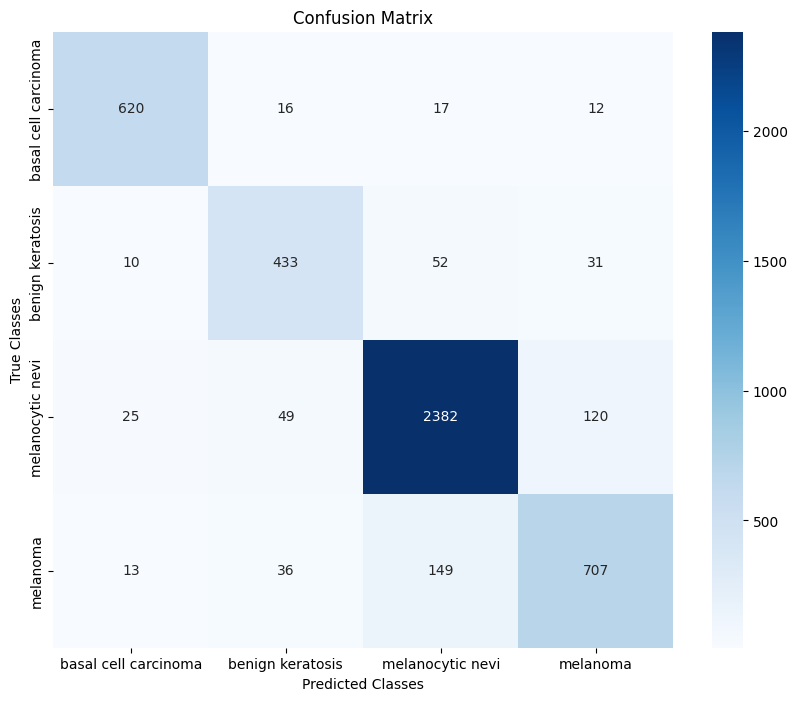

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Menampilkan confusion matrix dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels)

plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()


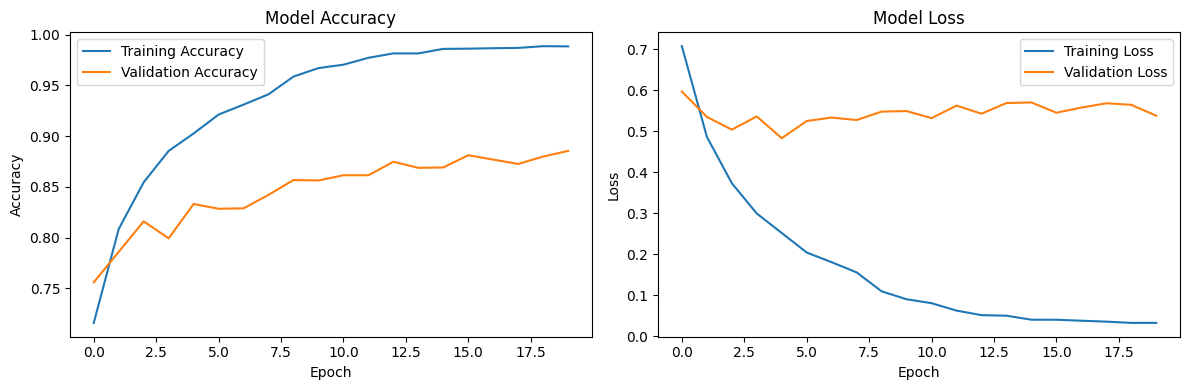

In [45]:
# 6. Visualisasi history training (learning curves)
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()